In [ ]:
Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/jonathansantos/Downloads/amz_uk_price_prediction_dataset.csv")

In [4]:
#Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [23]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [24]:
# Cruce entre columnas
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])


In [27]:

crosstab_result['proportion_best_seller'] = crosstab_result[True] / crosstab_result.sum(axis=1)


In [28]:
# Ordenar las categorías en función de la proporción en orden descendente
crosstab_sorted = crosstab_result.sort_values(by='proportion_best_seller', ascending=False)

In [29]:
crosstab_sorted

isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [30]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category
from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [32]:
from scipy.stats import chi2_contingency

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(crosstab_result)

# Print the p-value
print(f"The p-value is {p}")

The p-value is 0.0


<AxesSubplot:xlabel='category'>

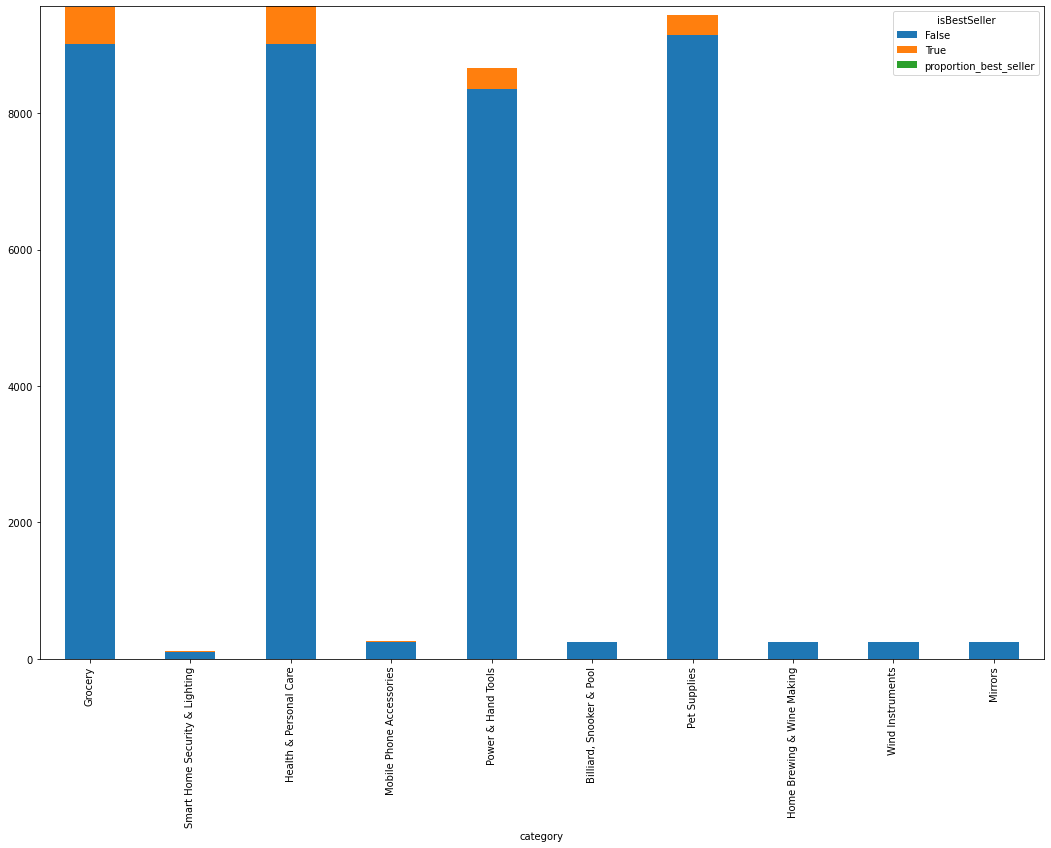

In [36]:
crosstab_sorted = crosstab_sorted.head(10)
crosstab_sorted.plot(kind="bar", stacked=True, figsize=(18,12))

In [42]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
crosstab_result = pd.crosstab(df['MSZoning'], df['SaleCondition'])

crosstab_result
# Filter out outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [43]:
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


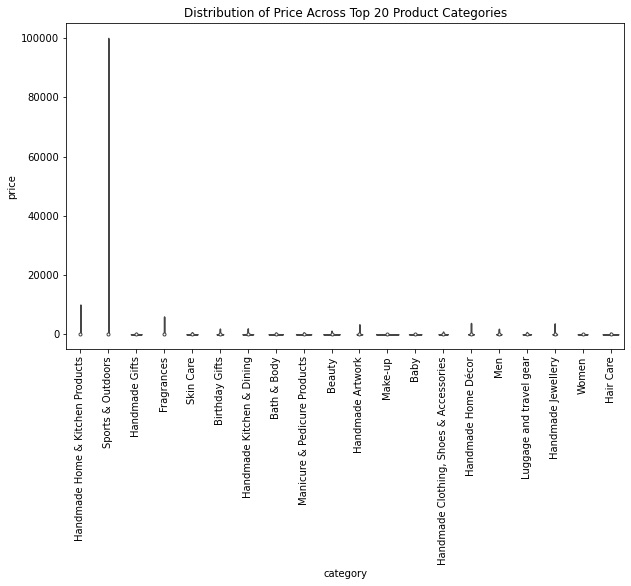

In [47]:
# Assuming df is your DataFrame, 'category' and 'price' are your columns
top_20_categories = df['category'].value_counts().nlargest(20).index
filtered_df = df[df['category'].isin(top_20_categories)]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Distribution of Price Across Top 20 Product Categories')
plt.show()

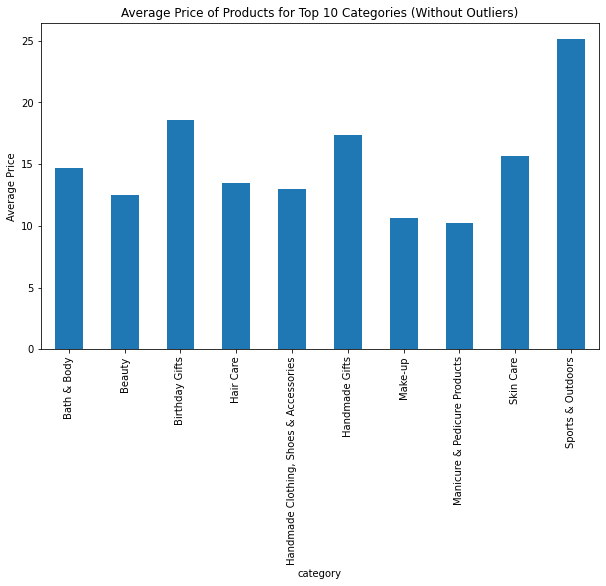

In [49]:
# Remove outliers from 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Find the top 10 product categories based on count
top_10_categories = df_no_outliers['category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only these categories
filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calculate the average price for each category
average_prices = filtered_df.groupby('category')['price'].mean()

# Create the bar chart
average_prices.plot(kind='bar', figsize=(10,6))
plt.ylabel('Average Price')
plt.title('Average Price of Products for Top 10 Categories (Without Outliers)')
plt.show()

In [50]:
correlation_coefficient = df['price'].corr(df['stars'])

print(correlation_coefficient)

-0.1249067326214861


<AxesSubplot:xlabel='stars', ylabel='price'>

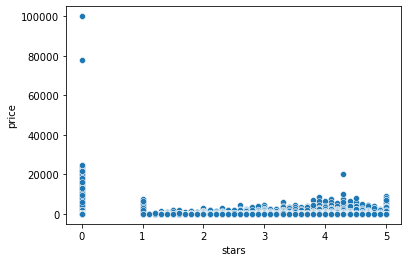

In [51]:
sns.scatterplot(data=df, x='stars', y='price')

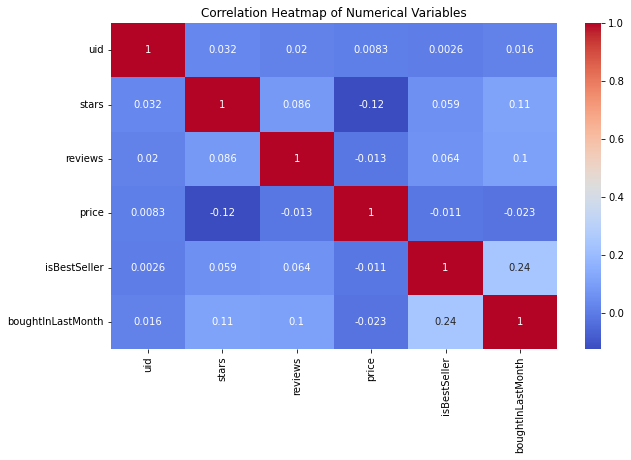

In [53]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()